In [2]:
# rename file names

import os

pwd = "/mnt/data/noise2noise-pytorch/supersample_data/valid/input/"
for count, filename in enumerate(os.listdir(pwd)): 
    str1 = filename.split('.')
    newname = str1[0][0: -2] + ".png"
    os.rename(pwd+filename, pwd+newname)

In [13]:
# split data
import os
import shutil

SRC_DIR = "/mnt/data/final-project/Images/"
DST_DIR = "/mnt/data/noise2noise-pytorch/supersample_data/"

# 70-15-15 data split
train_range = range(0, 7000)
valid_range = range(7000, 8500)
test_range = range(8500, 10000)

# copy train data
# red triangles
do_train = False
do_valid = False
do_test = False
if (do_train):
    for i in train_range:
        # input
        src_name = SRC_DIR + "red-input/red-input/red-" + str(i) + ".png"
        dst_name = DST_DIR + "train/input/red-" + str(i) + ".png"
        shutil.copyfile(src_name, dst_name)
        # target
        src_name = SRC_DIR + "red-target/red-target/red-" + str(i) + ".png"
        dst_name = DST_DIR + "train/target/red-" + str(i) + ".png"
        shutil.copyfile(src_name, dst_name)
        
if (do_valid):
    for i in valid_range:
        # input
        src_name = SRC_DIR + "red-input/red-input/red-" + str(i) + ".png"
        dst_name = DST_DIR + "valid/input/red-" + str(i) + ".png"
        shutil.copyfile(src_name, dst_name)
        # target
        src_name = SRC_DIR + "red-target/red-target/red-" + str(i) + ".png"
        dst_name = DST_DIR + "valid/target/red-" + str(i) + ".png"
        shutil.copyfile(src_name, dst_name)
        
if (do_test):
    for i in test_range:
        # input
        src_name = SRC_DIR + "red-input/red-input/red-" + str(i) + ".png"
        dst_name = DST_DIR + "test/input/red-" + str(i) + ".png"
        shutil.copyfile(src_name, dst_name)
        # target
        src_name = SRC_DIR + "red-target/red-target/red-" + str(i) + ".png"
        dst_name = DST_DIR + "test/target/red-" + str(i) + ".png"
        shutil.copyfile(src_name, dst_name)

DIR = DST_DIR + "train/input"
print("train/input count " +  str(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])))

DIR = DST_DIR + "train/target"
print("train/target count " +  str(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])))

DIR = DST_DIR + "valid/input"
print("valid/input count " +  str(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])))

DIR = DST_DIR + "valid/target"
print("valid/target count " +  str(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])))

DIR = DST_DIR + "test/input"
print("test/input count " +  str(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])))

DIR = DST_DIR + "test/target"
print("test/target count " +  str(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])))



train/input count 7000
train/target count 7000
valid/input count 1500
valid/target count 1500
test/input count 1500
test/target count 1500


<class 'numpy.ndarray'>
MSE: 8069.333333333333


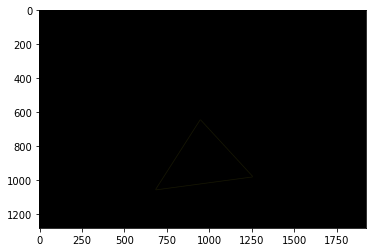

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

INPUT = "/mnt/data/noise2noise-pytorch/supersample_data/new_test/input/red-28.png"
TARGET = "/mnt/data/noise2noise-pytorch/supersample_data/new_test/target/red-28.png"

A = cv2.imread(INPUT)
print(type(A))
B = cv2.imread(TARGET)

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)
    
plt.imshow(lpB[5])

mse = np.sum(np.sqrt((lpB[5] - lpA[5])**2))/len(lpB)
print("MSE: " + str(mse))

MSE: 0.3125


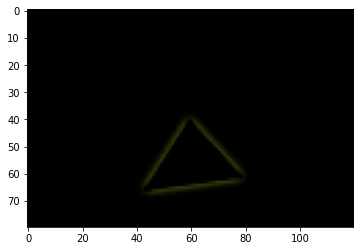

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

INPUT = "/mnt/data/noise2noise-pytorch/supersample_data/new_test/input/red-28.png"
TARGET = "/mnt/data/noise2noise-pytorch/supersample_data/new_test/target/red-28.png"

A = cv2.imread(INPUT)
B = cv2.imread(TARGET)

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

GE = cv2.pyrUp(gpA[5])
generated_laplacian = cv2.subtract(gpA[4], GE)

# generate Laplacian Pyramid for target
GE2 = cv2.pyrUp(gpB[5])
target_laplacian = cv2.subtract(gpB[4], GE2)
    
plt.imshow(generated_laplacian)

mse = np.sum(np.sqrt((generated_laplacian - target_laplacian)**2))/len(target_laplacian)
print("MSE: " + str(mse))

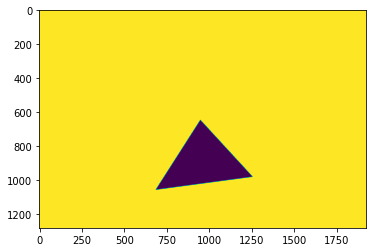

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

INPUT = "/mnt/data/noise2noise-pytorch/supersample_data/new_test/input/red-28.png"
TARGET = "/mnt/data/noise2noise-pytorch/supersample_data/new_test/target/red-28.png"

A = cv2.imread(INPUT)
B = cv2.imread(TARGET)

gray_A = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)

# Using the Canny filter to get contours
edges = cv2.Canny(gray_A, 20, 30)
# Using the Canny filter with different parameters
edges_high_thresh = cv2.Canny(gray_A, 60, 120)
# Stacking the images to print them together
# For comparison
images = np.hstack((gray_A, edges, edges_high_thresh))

# Display the resulting frame
plt.imshow(gray_A)

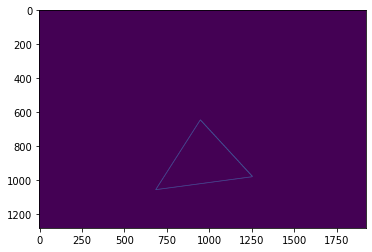

In [5]:
plt.imshow(edges_high_thresh)

In [7]:
mse = np.sum(np.sqrt((edges - edges_high_thresh)**2))/len(edges_high_thresh)
print("MSE: " + str(mse))

MSE: 0.0


In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

INPUT = "/mnt/data/noise2noise-pytorch/supersample_data/new_test/target/red-28-built.png"
TARGET = "/mnt/data/noise2noise-pytorch/supersample_data/new_test/target/red-28.png"

A = cv2.imread(INPUT)
print(A.shape)
B = cv2.imread(TARGET)

gray_A = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
gray_B = cv2.cvtColor(B, cv2.COLOR_BGR2GRAY)

# Using the Canny filter to get contours
edges_A = cv2.Canny(gray_A, 20, 30)
# Using the Canny filter with different parameters
edges_B = cv2.Canny(gray_B, 20, 30)

GA_tensor = torch.FloatTensor(A)
GB_tensor = torch.FloatTensor(B)
mse_loss = nn.MSELoss()
image_l2_loss = mse_loss(GA_tensor, GB_tensor)
print("pytorch image L2 Loss: ", str(image_l2_loss))

A_tensor = torch.FloatTensor(edges_A)
B_tensor = torch.FloatTensor(edges_B)
mse_loss = nn.MSELoss()
edge_l2_loss = mse_loss(A_tensor, B_tensor)
print("pytorch edge L2 Loss: ", str(edge_l2_loss))

(1280, 1920, 3)
pytorch image L2 Loss:  tensor(1.5055)
pytorch edge L2 Loss:  tensor(15.6636)


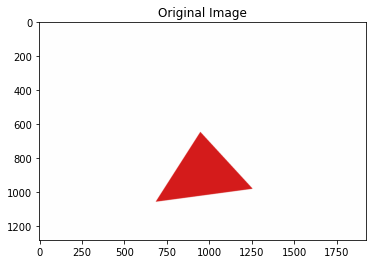

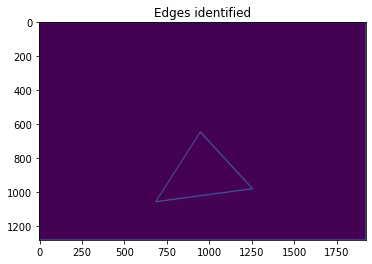

In [33]:
import torch
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torchvision.transforms as transforms

INPUT = "/mnt/data/noise2noise-pytorch/supersample_data/new_test/target/red-28-built.png"
TARGET = "/mnt/data/noise2noise-pytorch/supersample_data/new_test/target/red-28.png"

#reading image
#imsize = [512,512] if torch.cuda.is_available() else [128,128] # use small size if no gpu
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

loader = transforms.Compose([
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

image = image_loader(INPUT)

#compute image gradient
def gradient_img(img):
    img = img.squeeze(0)
    ten=torch.unbind(img)
    x=ten[0].unsqueeze(0).unsqueeze(0)
    
    a=np.array([[1, 0, -1],[2,0,-2],[1,0,-1]])
    conv1=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
    conv1.weight=nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
    G_x=conv1(Variable(x)).data.view(1,x.shape[2],x.shape[3])

    b=np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]])
    conv2=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
    conv2.weight=nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
    G_y=conv2(Variable(x)).data.view(1,x.shape[2],x.shape[3])

    G=torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))
    return G

grad = gradient_img(image)

#plotting
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated


plt.figure()
imshow(image, title='Original Image')
imshow(grad, title='Edges identified')

In [34]:
generated = image_loader(INPUT)
generated_grad = gradient_img(generated)
target = image_loader(TARGET)
target_grad = gradient_img(target)
mse_loss = nn.MSELoss()
edge_l2_loss = mse_loss(A_tensor, B_tensor)
print("pytorch edge L2 Loss: ", str(edge_l2_loss))

pytorch edge L2 Loss:  tensor(15.6636)
